In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
import warnings
warnings.filterwarnings(action='ignore')  

train = pd.read_csv('./data/FIFA_train.csv')
test = pd.read_csv('./data/FIFA_test.csv')
submission  = pd.read_csv('./data/submission.csv')

In [26]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [27]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [29]:
train.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [30]:
test.isna().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

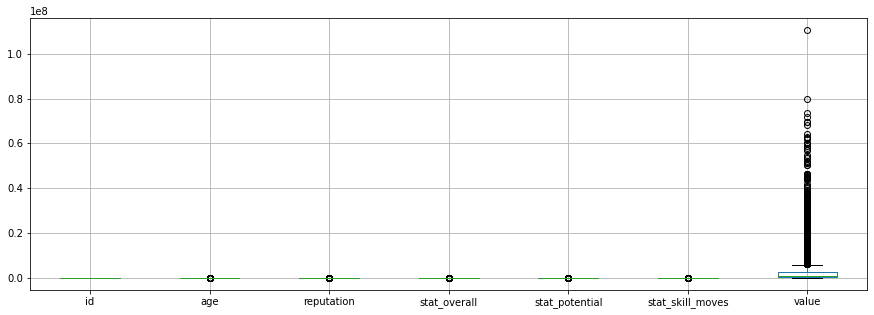

In [31]:
plt.figure(figsize=(15,5))
train.boxplot()

In [32]:
train.describe(include='all')

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932,8932.000000,8932,8932,8932,8932,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
unique,NaN,8932,NaN,5,17,4,2,NaN,NaN,NaN,NaN,NaN
top,NaN,L. Messi,NaN,europe,2019,MF,right,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,5322,2366,3428,6837,NaN,NaN,NaN,NaN,NaN
mean,7966.775750,NaN,25.209136,NaN,NaN,NaN,NaN,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,NaN,4.635515,NaN,NaN,NaN,NaN,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,NaN,16.000000,NaN,NaN,NaN,NaN,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,NaN,21.000000,NaN,NaN,NaN,NaN,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,NaN,25.000000,NaN,NaN,NaN,NaN,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,NaN,28.000000,NaN,NaN,NaN,NaN,1.000000,72.000000,76.000000,3.000000,2.600000e+06


In [33]:
train.corr()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
id,1.000000,-0.475785,-0.423739,-0.972374,-0.630199,-0.402455,-0.544280
age,-0.475785,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,-0.423739,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,-0.972374,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.630199,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,-0.402455,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,-0.544280,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


## 간단한 전처리

In [34]:
train.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value'],
      dtype='object')

In [35]:
train.contract_until.value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [36]:
#contract_until 변수 int 형으로 변환
# 계약 연도만 추출
def func(string):
    string = string[-4:]
    return int(string)

train['contract_until'] = train['contract_until'].apply(func)
test['contract_until'] = test['contract_until'].apply(func)

In [37]:
train['continent'] = train['continent'].astype('category').cat.codes
test['continent'] = test['continent'].astype('category').cat.codes

train['position'] = train['position'].astype('category').cat.codes
test['position'] = test['position'].astype('category').cat.codes

train['prefer_foot'] = train['prefer_foot'].astype('category').cat.codes
test['prefer_foot'] = test['prefer_foot'].astype('category').cat.codes

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   int8   
 4   contract_until    8932 non-null   int64  
 5   position          8932 non-null   int8   
 6   prefer_foot       8932 non-null   int8   
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(5), int8(3), object(1)
memory usage: 654.3+ KB


In [81]:
feature=['age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves']
x_train = train[feature]
y_train = train['value']
x_test = test[feature]

## 모델링

In [57]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization

n_folds = 3

def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

- **RandomForestRegressor**

In [52]:
model_rf = RandomForestRegressor(n_estimators=500, random_state=22)

In [53]:
score = rmse_cv(model_rf)
rf_score = score.mean()
rf_score

3447858.9370384165

In [ ]:
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)
pred_rf

In [ ]:
submission['value'] = pred_rf
submission.to_csv('submit_rf.csv',index = False)

<모델 저장하기>

In [ ]:
joblib.dump(model_rf, './model/rf_model.pkl')

<모델 불러오기>

In [ ]:
#model_rf = joblib.load('./model/rf_model.pkl')

- **GradientBoostingRegressor**

In [54]:
model_gb = GradientBoostingRegressor(random_state=22)

In [55]:
score = rmse_cv(model_gb)
gb_score = score.mean()
gb_score

3392728.1479880777

- **LGBMRegressor**

In [86]:
model_lgb = LGBMRegressor(random_state=22)

In [87]:
score = rmse_cv(model_lgb)
lgb_score = score.mean()
lgb_score

3425129.656807712

- **XGBRegressor**

In [88]:
model_xgb = XGBRegressor(random_state=22)

In [89]:
score = rmse_cv(model_xgb)
xgb_score = score.mean()
xgb_score

3404851.052624369

- **ExtraTreesRegressor**

In [90]:
model_extree = ExtraTreesRegressor(random_state=22)

In [91]:
score = rmse_cv(model_extree)
extree_score = score.mean()
extree_score

3434436.7928918004

- **CatBoostRegressor**

In [59]:
param_grid = {
    'depth' : list(range(2,13)), #[2,3,4,5,6,7,8,9,10], 
    'learning_rate' : [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25]
}
rand_cat = RandomizedSearchCV(CatBoostRegressor(random_state = 22), param_distributions=param_grid, 
                              cv = KFold(n_splits = 4, shuffle = True, random_state = 22), 
                              scoring = 'neg_mean_squared_error', n_jobs = -1)
rand_cat.fit(x_train, y_train)

0:	learn: 5047556.4025211	total: 141ms	remaining: 2m 20s
1:	learn: 4439485.0295445	total: 143ms	remaining: 1m 11s
2:	learn: 3872201.8971184	total: 145ms	remaining: 48.3s
3:	learn: 3436792.6176877	total: 147ms	remaining: 36.7s
4:	learn: 3078333.7543357	total: 150ms	remaining: 29.8s
5:	learn: 2794536.1700739	total: 152ms	remaining: 25.1s
6:	learn: 2547167.2879196	total: 154ms	remaining: 21.9s
7:	learn: 2348115.8891746	total: 155ms	remaining: 19.2s
8:	learn: 2189314.8203262	total: 156ms	remaining: 17.2s
9:	learn: 2062273.4210858	total: 157ms	remaining: 15.5s
10:	learn: 1948838.7243503	total: 158ms	remaining: 14.2s
11:	learn: 1843949.5545665	total: 159ms	remaining: 13.1s
12:	learn: 1749782.5731629	total: 159ms	remaining: 12.1s
13:	learn: 1685535.5275471	total: 160ms	remaining: 11.3s
14:	learn: 1646659.7720607	total: 161ms	remaining: 10.6s
15:	learn: 1606681.6218269	total: 162ms	remaining: 9.96s
16:	learn: 1569221.3437387	total: 163ms	remaining: 9.41s
17:	learn: 1539203.1172281	total: 164ms

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=22, shuffle=True),
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000017AA66D4850>,
                   n_jobs=-1,
                   param_distributions={'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12],
                                        'learning_rate': [0.0005, 0.001, 0.005,
                                                          0.01, 0.05, 0.1, 0.2,
                                                          0.25]},
                   scoring='neg_mean_squared_error')

In [60]:
rand_cat.best_params_

{'learning_rate': 0.2, 'depth': 2}

In [82]:
model_cat = CatBoostRegressor(depth=2, learning_rate=0.2, eval_metric='RMSE', verbose=0, random_seed=22)

In [83]:
score = rmse_cv(model_cat)
cat_score = score.mean()
cat_score

3390873.6027002097

In [84]:
model_cat.fit(x_train, y_train)
pred_cat = model_cat.predict(x_test)
pred_cat

array([ 8.53760279e+07,  8.96437931e+07,  8.19482167e+07, ...,
        1.96297536e+04, -1.78555311e+04,  1.34471064e+03])

In [85]:
submission['value'] = pred_cat
submission.to_csv('submit_cat.csv',index = False)